In [ ]:
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/metaFiles2/meta_Electronics.json.gz

--2021-10-20 00:25:04--  http://deepyeti.ucsd.edu/jianmo/amazon/metaFiles2/meta_Electronics.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1198601797 (1.1G) [application/octet-stream]
Saving to: ‘meta_Electronics.json.gz’

meta_Electronics.js 100%[===================>]   1.12G  21.1MB/s    in 55s     

2021-10-20 00:26:00 (20.6 MB/s) - ‘meta_Electronics.json.gz’ saved [1198601797/1198601797]



In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Project/Amazon_Review_Data/reviews_Digital_Cameras.csv')

In [ ]:
data

,Unnamed: 0,Unnamed: 0.1,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,2345,2345,A31UHOIFMFSCN1,B00000JBIA,D. Mitchell,"[24, 24]",It is absolutely useless. The pictures are gr...,1.0,This camera is HORRIBLE!,971308800,"10 12, 2000"
1,2346,2346,A1ZYDU26TKRNAW,B00000JBIA,J. Burke,"[5, 5]",I bought two of these for my kids and they are...,1.0,Just awful; avoid at all costs,986774400,"04 9, 2001"
2,2347,2347,A1RPTVW5VEOSI,B00000JBIA,Michael J. Edelman,"[47, 47]","I bought the Smile to have a handy, inexpensiv...",1.0,Not the best choice,950140800,"02 10, 2000"
3,2348,2348,A26FYKG5LAHRUH,B00000JBIA,Ramon GT,"[16, 17]",". STOP!!! . 1/ This camera is NOT 640x480, is ...",1.0,BE CAREFUL!!!,966297600,"08 15, 2000"
4,2349,2349,A3MEIR72XKQY88,B00000JBIA,Simon Said,"[28, 42]","I'm on a small budget this summer, so I bought...",1.0,"Worse than I thought, but at that price...",960249600,"06 6, 2000"
...,...,...,...,...,...,...,...,...,...,...,...
27408,1688500,1688500,A2D9DSJIH4FRMC,B00K7O2DJU,S. Vogt,"[11, 11]",PROs and CONsPROs:-Excellent image quality. Th...,5.0,3rd time is (mostly) a charm.,1404518400,"07 5, 2014"
27409,1688501,1688501,A2JFUCU9AICV3F,B00K7O2DJU,"The Creative Fellow ""Photographer/Mac Geek""","[19, 19]",This is the camera I have been waiting a loooo...,5.0,The perfect little camera when I want high qua...,1405123200,"07 12, 2014"
27410,1688502,1688502,A3HYT0PU6YTMJZ,B00K7O2DJU,"T. Ishizue ""Tom""","[13, 34]","Before I placed my order for this camera, I tr...",3.0,Cannot take still photos while shooting video,1403568000,"06 24, 2014"
27411,1688503,1688503,A20R0T8NXW9MRC,B00K7O2DJU,Walt Kurtz,"[75, 76]",I bought the RX100 in its original configurati...,5.0,A Very Nice Upgrade from Sony - Update 6/22/14,1403222400,"06 20, 2014"


In [ ]:
columns = ['overall','reviewText']
df2 = data[columns]

In [ ]:
df2.head()

,overall,reviewText
0,1.0,It is absolutely useless. The pictures are gr...
1,1.0,I bought two of these for my kids and they are...
2,1.0,"I bought the Smile to have a handy, inexpensiv..."
3,1.0,". STOP!!! . 1/ This camera is NOT 640x480, is ..."
4,1.0,"I'm on a small budget this summer, so I bought..."


In [ ]:
#@title Explore different rated reviews
stars = 2#@param {type: "integer"}

for i in df2[df2['overall'] == stars]['reviewText'].head(5).values:
  print(i + '\n\n')

Skip this digital camera and go directly to the Coolpix 880 by Nikon (also on Amazon). Why, you ask? Well, this Coolpix is quite old (in terms of digital) and you'll be throwing your good money after a badly outdated camera. Here are the details why:Megapixels. The Coolpix 800 takes 2.1 megapixel pictures, but the 880 take 3.1 megapixel.  (More pixels are preferred to less since this will affect your image quality. ANd believe me - you will SEE the difference!)Zoom. The 800 has a 2x optical, plus 2.5 digital zoom lens; however, the 880 has a 2.5x optical and the digital zoom.  You always want as high an optical zoom because using pure digital zoom will make your pictures look fuzzy!Memory. Both the 800 and 880 come with 8 MB of CompactFlash, but most people would agree that this isn't enough.  Purchase an additional CompactFLash card for 32 MB or more and you'll be happy you did.Downloading. The 800 only connects via serial port, but the 880 connects via serial OR USB. THe USB connecti

### Word Clouds


In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

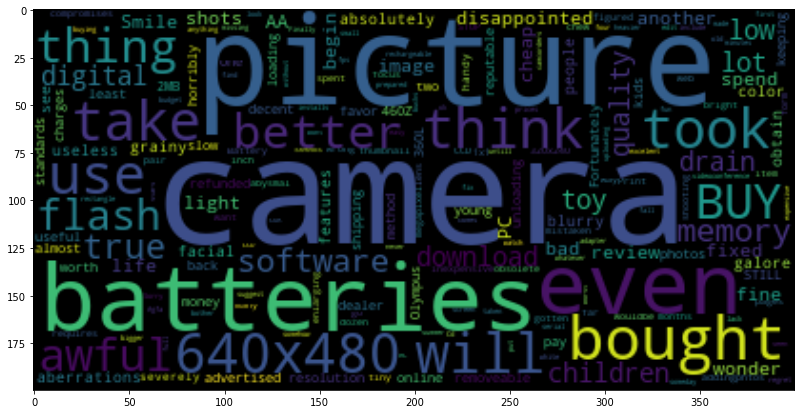

In [ ]:
stars = 2#@param {type: "integer"}
text = ''
stopwords = set(STOPWORDS)

for i in df2[df2['overall'] == stars]['reviewText'].head(5).values:
  text += i + ' '

wordcloud = WordCloud(stopwords = stopwords)
wordcloud.generate_from_text(text)
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')